We're going to be counting the occurences of various types of punctuation across the Postmodern and Post 9/11 corpora. As per usual, we will start with Postmodern, then move to Post 9/11, and finally merge the results.

In [16]:
# these are the imports we'll be using
%matplotlib inline
import nltk
from nltk.tokenize import sent_tokenize
import glob
import numpy as np
import matplotlib.pyplot as plt
import string
import book
plt.style.use('seaborn-white')

In [2]:
# read in all the novels in the postmodern corpus
postmodern = []

for filename in glob.glob('postmodern/*.txt'):
    try:
        postmodern.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)

Calling string.punctuation only provides relatively conventional punctuation, and we're interested in some of the bizarre characters in the postmodern corpus. To work around this, we'll just go through the entirety of the corpus, and count the occurences of different characters.

We're going to use what Python calls a `dictionary`. In other languages, these are known as `hashtables` or `hashmaps`. But you shouldn't worry about that. What we do below, is look up whether a non-ascii character that we're encountering already exists in our dictionary (that is, whether we've seen it before). If it does, we increment the count by one, and if it hasn't we add it to the dictionary with a count of one.

In [3]:
punct = {} # creates a dictionary

for book in postmodern:
    for char in book.text:
        if char not in string.ascii_letters:
            if char in punct:
                punct[char] += 1
            else: 
                punct[char] = 1

# show the results, in no particular order
punct.keys()

dict_keys(['ï', 'Ü', 'Œ', 'ó', 'í', '½', 'ß', ']', '°', 'ö', '–', '¿', '(', '0', 'Í', '*', ' ', '%', '!', "'", '”', 'γ', '+', 'ú', '‘', '}', '«', 'û', '…', ',', 'è', '′', '’', 'á', 'Ö', '@', '#', '>', '4', '9', 'ž', ';', '.', 'ê', 'Δ', 'ù', '_', 'ô', '?', '[', '{', '©', '™', '∞', ':', '¡', '&', '6', '1', 'ü', '¢', 'ã', '3', ')', 'Ê', '¾', '5', '"', 'î', 'š', '8', 'Ó', 'ð', 'ä', '^', '•', '7', 'ə', 'ì', '/', '®', '~', 'à', '—', '§', '“', '¼', '\n', '-', 'É', 'Ñ', '$', '´', 'Æ', '\\', '=', 'é', 'θ', '2', 'ϕ', 'Ä', 'Ô', 'â', 'ś', 'ñ', 'ç', 'ë', '·', '£'])

There are any number of ways to group these symbols. I've lumped them into 18 different categories.

In [4]:
greek = ['ß','ϕ','γ','θ','Δ'] 
xlatin = ['ê','ï', 'ð','â','ì','É','ś','Í','ü','ô', 'ù','Ä', 'Ñ','Æ','Ó','ë','é','á', 'à', 'ú','Ê','Ü', 'ž','š','í', 'Œ', 'ñ', 'ã', 'è','î','ä', 'ə','ó','û','Ö','ç', 'ö', 'Ô']
quotes = ['“','´', "'",'’', '”','"','‘','′']
random = ['@', '#', '&','*']
conventional = ['.','!','?',',']
logical_symb = ['>','\\','=','/','~']
colon = [':']
semicolon = [';']
guillemets = ['«']
currency = ['¢','$','£']
intprop = ['™','®','©']
inverted = ['¿','¡']
ellipses = ['…']
bullets = ['•','·','§']
brackets = [')',']','}','[','(','{']
nonconv = ['°','^']
dashes = ['—','-','_','–']
math = ['∞','%','½','+','¾','¼']

mac = [greek, xlatin, quotes, random, conventional, logical_symb, colon, semicolon, guillemets, currency, intprop, inverted, ellipses, bullets, brackets, nonconv, dashes, math]

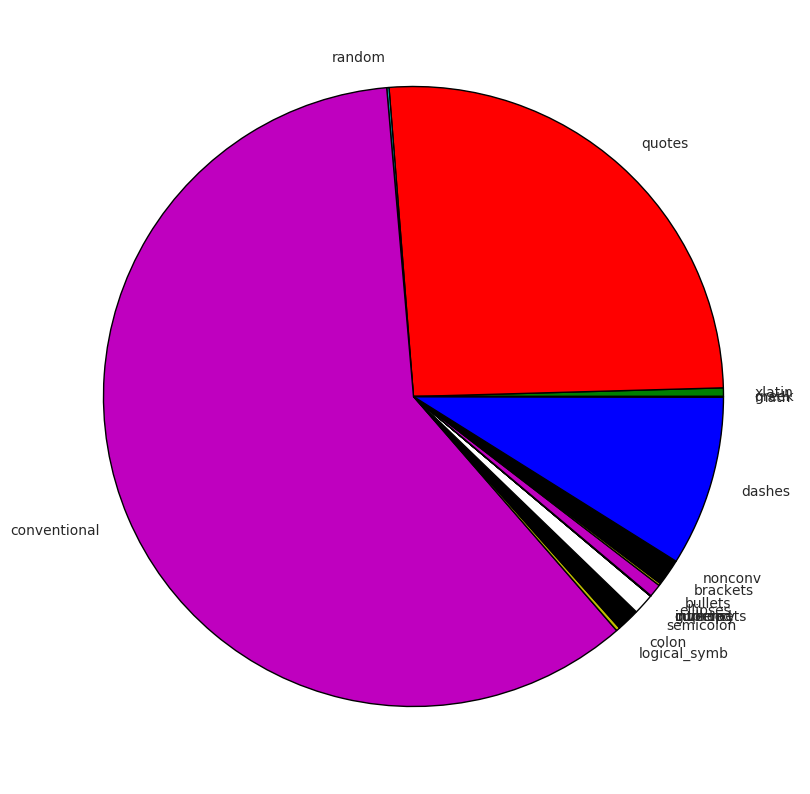

In [27]:
# lets make a pie chart
counts = [0 for x in range(len(mac))]
cats = ['greek', 'xlatin', 'quotes', 'random', 'conventional', 'logical_symb', 'colon', 'semicolon', 'guillemets', 'currency', 'intprop', 'inverted', 'ellipses', 'bullets', 'brackets', 'nonconv', 'dashes', 'math']

for cat in range(len(mac)):
    for symb in mac[cat]:
        counts[cat] += punct[symb]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.pie(counts, labels=cats)
plt.show()

In [6]:
for x in range(len(counts)): print('{}: \t {:f}'.format(cats[x], counts[x]/sum(counts)))

greek: 	 0.000061
xlatin: 	 0.004398
quotes: 	 0.258128
random: 	 0.001191
conventional: 	 0.600011
logical_symb: 	 0.001999
colon: 	 0.011951
semicolon: 	 0.010872
guillemets: 	 0.000006
currency: 	 0.000180
intprop: 	 0.000123
inverted: 	 0.000006
ellipses: 	 0.006732
bullets: 	 0.001178
brackets: 	 0.013893
nonconv: 	 0.000104
dashes: 	 0.088874
math: 	 0.000292


This is pretty useful, but it might be more useful to see how much punctuation is being used relative to characters.

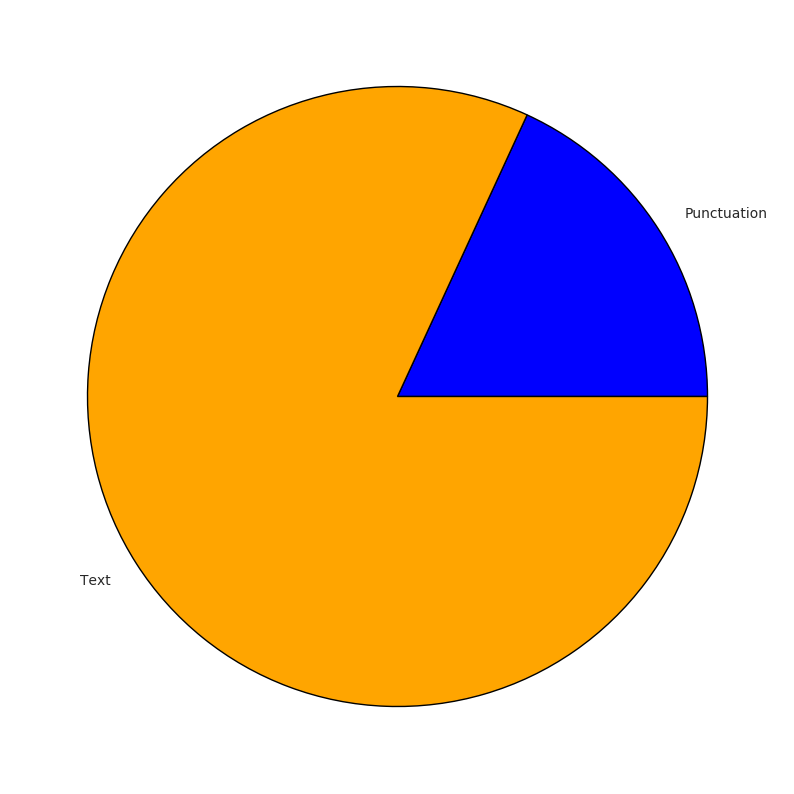

0.22151866012122642


In [37]:
p1 = sum(punct.values()) 
p2 = sum([len(n.text) for n in postmodern])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.pie([p1,p2], labels=['Punctuation','Text'], colors=['blue','orange'])
plt.show()

print(p1 / p2)

In [38]:
post911 = []
punct1 = {}

for filename in glob.glob('post911/*.txt'):
    try:
        post911.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)
        
post911.sort(key=lambda x: x.year)

for book in post911:
    for char in book.text:
        if char not in string.ascii_letters:
            if char in punct1:
                punct1[char] += 1
            else: 
                punct1[char] = 1

In [39]:
# add the new symbols to our old lists
math += ['±','×','∃','∀','≡']
logical_symb += ['<','∼']
random += ['¸','¯','†','⁄','→','↓','˜']
guillemets.append('»')
greek += ['β','α']
currency.append('‰')
xlatin += ['æ', 'õ']
quotes.append('`')

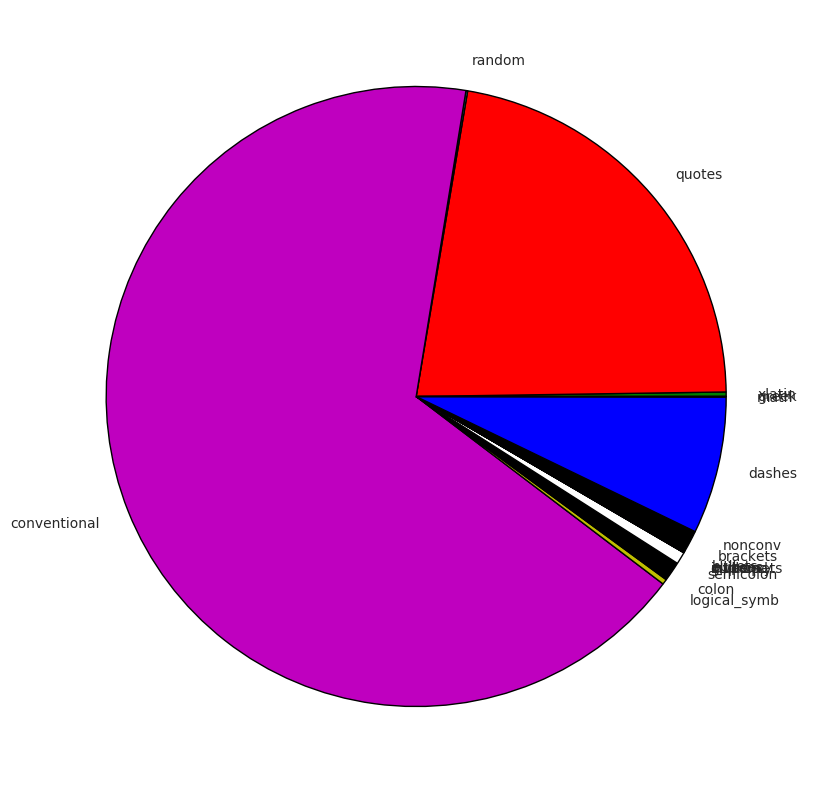

In [40]:
counts1 = [0 for x in range(len(mac))]

for cat in range(len(mac)):
    for symb in mac[cat]:
        try:
            counts1[cat] += punct1[symb]
        except:
            counts1[cat] += 0

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.pie(counts1, labels=cats)
plt.show()

In [41]:
for x in range(len(counts1)): print('{}: \t {:f}'.format(cats[x], counts1[x]/sum(counts1)))

greek: 	 0.000113
xlatin: 	 0.002220
quotes: 	 0.221089
random: 	 0.000888
conventional: 	 0.672336
logical_symb: 	 0.002724
colon: 	 0.010183
semicolon: 	 0.006375
guillemets: 	 0.000005
currency: 	 0.000326
intprop: 	 0.000072
inverted: 	 0.000012
ellipses: 	 0.000572
bullets: 	 0.000442
brackets: 	 0.010789
nonconv: 	 0.000080
dashes: 	 0.071549
math: 	 0.000224


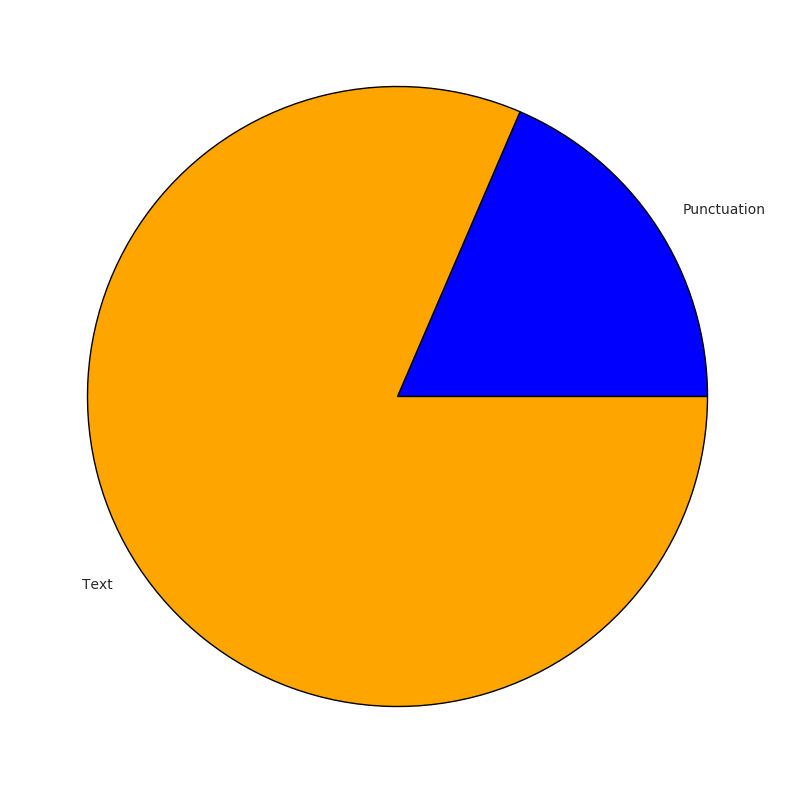

0.2274854802260053


In [42]:
p1 = sum(punct1.values()) 
p2 = sum([len(n.text) for n in post911])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.pie([p1,p2], labels=['Punctuation','Text'], colors=['blue','orange'])
plt.show()

print(p1 / p2)

The differences in the subcategories isn't very informative, so we'll look at how conventional punctuation changes over time.

In [45]:
inq = conventional + [';']
pmod_conventional = [punct[c] for c in inq]
p911_conventional = [punct1[c] for c in inq]

for n in range(len(inq)):
    a = pmod_conventional[n] / sum(pmod_conventional)
    b = p911_conventional[n] / sum(p911_conventional)
    print("{} : {}, {}".format(inq[n],a,b))

. : 0.44541988301663327, 0.47785323188508855
! : 0.01443071904252335, 0.01433193486453815
? : 0.04583753233665444, 0.05007466401194624
, : 0.4765150177137336, 0.4483467254497618
; : 0.017796847890455363, 0.009393443788665292
